### Assginment 1 for complex networks - Zsofia Prager

1. Select a biological network that you find interesting, and which consists of hundreds of nodes (at least 200 nodes).

The used network data can be found in the following URL:
https://networkrepository.com/bio-grid-mouse.php

2. Load the Network Data<br>• Using Python, load the network data into a graph class. You may use libraries like networkx or igraph for this purpose.<br>
• Check the type of network (undirected/directed, unweighted/weighted).<br>
• If the network is not (weakly) connected, select the largest connected component (LCC) for the rest of the analysis. This LCC must have at least 200 nodes.<br>

In [11]:
#import packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#get data from github
!wget 'https://raw.githubusercontent.com/zspdev/CN_A1/main/bio-grid-mouse.edges?token=GHSAT0AAAAAACKJHWZMMMOS5EINTNPQTIA4ZKTPJ4Q'

--2023-11-14 13:46:49--  https://raw.githubusercontent.com/zspdev/CN_A1/main/bio-grid-mouse.edges?token=GHSAT0AAAAAACKJHWZMMMOS5EINTNPQTIA4ZKTPJ4Q
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26641 (26K) [text/plain]
Saving to: ‘bio-grid-mouse.edges?token=GHSAT0AAAAAACKJHWZMMMOS5EINTNPQTIA4ZKTPJ4Q’

bio-grid-mouse.edge 100%[===================>]  26.02K  --.-KB/s    in 0s      

2023-11-14 13:46:49 (182 MB/s) - ‘bio-grid-mouse.edges?token=GHSAT0AAAAAACKJHWZMMMOS5EINTNPQTIA4ZKTPJ4Q’ saved [26641/26641]



In [31]:
# load in data
G = nx.read_edgelist("bio-grid-mouse.edges?token=GHSAT0AAAAAACKJHWZMMMOS5EINTNPQTIA4ZKTPJ4Q", delimiter=",")
print(G)

Graph with 1450 nodes and 1636 edges


The network is undirected and unweighted.

In [3]:
# check to see if the data is connected
nx.is_connected(G)

False

In [4]:
# get connected components
connected_components = list(nx.connected_components(G))

In [5]:
largest_connected_component = max(connected_components, key=len)

# ensure the largest connected component has at least 200 nodes
while len(largest_connected_component) < 200:
    connected_components.remove(largest_connected_component)
    largest_connected_component = max(connected_components, key=len)

In [6]:
# get largest connected component
LCC = G.subgraph(largest_connected_component)
print(LCC)

Graph with 791 nodes and 1098 edges


The final LCC is consisted of 791 nodes and 1098 edges.

3. Structure at the macroscale<br>
• Compute the following descriptors of the structure of the network at the macroscale level:<br>
o Basic features: number of nodes, number of edges, average degree, average clustering coefficient, assortativity.<br>
o Distances: radius, average shortest path length, diameter.<br>

In [7]:
#number of nodes
LCC.number_of_nodes()

791

In [8]:
#number of edges
LCC.number_of_edges()

1098

In [9]:
#avg degree
sum(dict(LCC.degree()).values()) / len(LCC)

2.7762326169405815

In [10]:
#average clustering coefficient
nx.average_clustering(LCC)

0.04686168357844294

In [11]:
#assortativity
nx.degree_assortativity_coefficient(LCC)

-0.2145185280808309

In [12]:
#radius
nx.radius(LCC)

15

In [13]:
#avg shortest path length
nx.average_shortest_path_length(LCC)

8.663009489670182

In [14]:
#diameter
nx.diameter(LCC)

30

4. Compute centralities<br>
• Calculate the following centralities of the nodes:<br>
 Degree, Betweenness, Closeness, Eigenvector (if the network is undirected), PageRank (if the network is directed).<br>
• For each centrality measure, list the top 10 nodes with the highest values.<br>

In [15]:
#Degree
degree_dict = nx.degree_centrality(LCC)
sorted_degree_dict= sorted(degree_dict.items(), key=lambda x:x[1], reverse=True)

In [16]:
sorted_degree_dict[0:10]

[('64', 0.14050632911392405),
 ('162', 0.09367088607594937),
 ('154', 0.05822784810126582),
 ('33', 0.056962025316455694),
 ('147', 0.049367088607594936),
 ('193', 0.043037974683544304),
 ('0', 0.035443037974683546),
 ('1269', 0.035443037974683546),
 ('28', 0.024050632911392405),
 ('240', 0.024050632911392405)]

In [17]:
#betweenness
between_dict=nx.betweenness_centrality(LCC)
sorted_between_dict=sorted(between_dict.items(), key=lambda x:x[1], reverse=True)
sorted_between_dict[0:10]

[('1269', 0.3845837823984205),
 ('55', 0.2858922219357998),
 ('162', 0.21789804544587832),
 ('464', 0.2103750876647578),
 ('64', 0.2097932971024829),
 ('607', 0.20613654146655722),
 ('6', 0.1906494676877021),
 ('1160', 0.1836306783065218),
 ('671', 0.17817592866348703),
 ('465', 0.16013990172760412)]

In [18]:
#closeness
closeness_dict=nx.closeness_centrality(LCC)
sorted_closeness_dict=sorted(closeness_dict.items(), key=lambda x:x[1], reverse=True)
sorted_closeness_dict[0:10]

[('55', 0.1917941247875698),
 ('1269', 0.188005711565921),
 ('162', 0.18419211937514574),
 ('33', 0.17979062357760583),
 ('58', 0.17685247369599283),
 ('64', 0.1767337807606264),
 ('9', 0.17470145953118088),
 ('1', 0.17462422634836428),
 ('1329', 0.1730937773882559),
 ('193', 0.17290435543882687)]

In [19]:
#eigenvector
eigenvector_dict=nx.eigenvector_centrality(LCC)
sorted_eigenvector_dict=sorted(eigenvector_dict.items(), key=lambda x:x[1], reverse=True)
sorted_eigenvector_dict[0:10]

[('64', 0.4936273049515337),
 ('162', 0.2717843397102256),
 ('154', 0.24837105727895048),
 ('147', 0.20615566426046186),
 ('33', 0.19500530110397712),
 ('0', 0.14854072788979888),
 ('1', 0.1335517442954309),
 ('13', 0.12019583186141436),
 ('7', 0.11948556477196824),
 ('8', 0.11088567348797063)]

5. Visualization<br>
• Draw the network graph.<br>
• Adjust visualization parameters (like layout, node size, node color, edge thickness, layout) such that some of the important or interesting features of the network become evident.

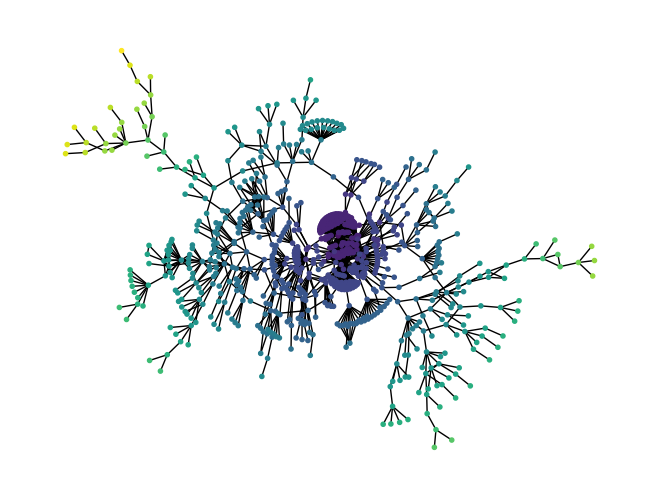

In [28]:
p = dict(nx.single_source_shortest_path_length(LCC, '69'))

nx.draw(LCC,
        pos=nx.kamada_kawai_layout(LCC),
        node_size=9,
        nodelist=list(p.keys()),
        node_color=list(p.values())
        )

6. Degree Distribution<br>
• Calculate the degree distribution of the network.<br>
• Plot the degree distribution on a linear scale using linear binning.<br>
• Plot the degree distribution on a log-log scale with appropriate binning.

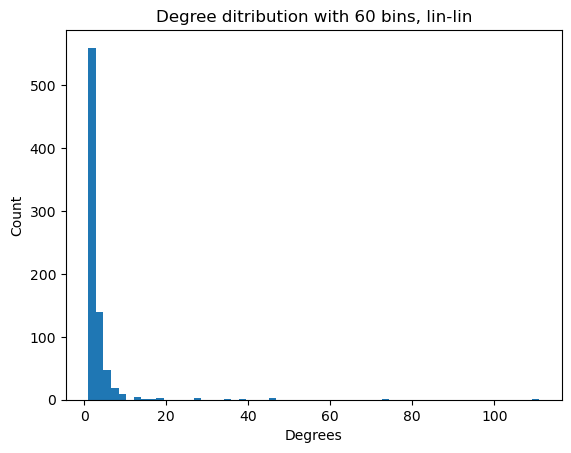

In [21]:
#degree distribution on a linear scale using linear binning
degrees = [LCC.degree(n) for n in LCC.nodes()]
plt.hist(degrees, bins=60)
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title(f"Degree distribution with 60 bins, lin-lin")
plt.show()


In [23]:
#degree distribution on a log-log scale with appropriate binning
import numpy as np
bins = [np.min(degrees)]
cur_value = bins[0]
multiplier = 1.5
while cur_value < np.max(degrees):
    cur_value = cur_value * multiplier
    bins.append(cur_value)

In [24]:
bins = np.array(bins)
bin_widths = bins[1:]-bins[0:-1]

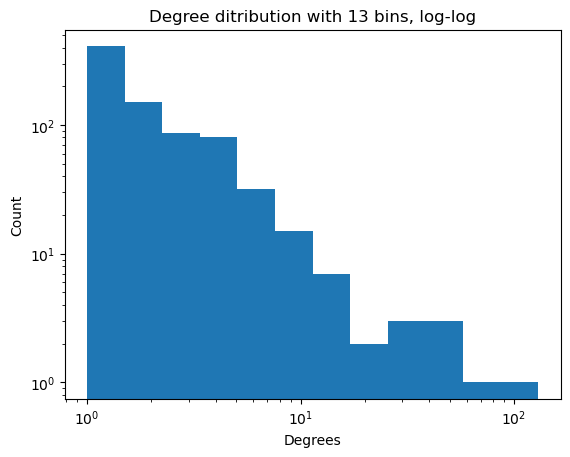

In [26]:
plt.hist(degrees, bins=bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degrees')
plt.ylabel('Count')
plt.title(f"Degree distribution with {len(bins)} bins, log-log")
plt.show()

Delivery<br>
• This is an individual assignment.<br>
• The delivery must consist of a single Jupyter notebook containing all the code, visualizations, analysis, and final report. The name of the file must be of the form:<br>
o A1-Name_Surname.ipynb<br>
• In the brief report, describe:<br>
o The network you have chosen and its relevance.<br>
o Key insights from the centrality measures.<br>
o Observations from the degree distribution.<br>

### Brief report:

I used the bio-grid-mouse network. The network itself is from the Biogrid database that is mainly focued on protein and genetic interactions in multiple species. The network I worked with was specifically focused on mouse genom. Unfortunatelly, I could not find any additional information about the network.

The chosen network was a not fully connected, undirected and unweighed network. I selected the largest connected component from the whole network for further analysis. The LLC finally consisted of 791 nodes and 1098 edges, making it a middle sized network. The average degree was 2.77, meaning that in average each network has 2.77 edges or connections. The average clustering coefficient of the network was 0.046, which is a small value, indicating that the nodes are less likely to group clusters. The average assortavity coefficiet is -0.214, which indicates that the nodes have a tendency to be connected with other nodes that have different degrees. In other words nodes with higher degrees are more likely to be connected to nodes with lower degrees and vice versa. The radius is 15 and the diamater is 30 and the average shortest path is 8.6, indicating again, that the network is not closely connected, the nodes are having generally few connections and low number of clusters or hubs.

The calculated degree centrality values indicate that there are not too many connected nodes in the network, the first few nodes are being relatively high, but then we can see a sudden drop in the values, indicating again that the networks is not very much clustered. Based on betweenness centrality we can see that nodes 1269, 55, 162 are the most important nodes of the network in terms of acting as bridges between further nodes. The same nodes are ended up providing the highest values with closeness centrality as well, which is indicating that these nodes are the closest to all other nodes in terms of the shortest paths. Finally the eigenvector centrality was the highest at nodes 64, 162, 154. These nodes are the ones that are most connected to the other well-connected nodes.

These previouly shown features are shown on our plot as well. As we can see the nodes are generally not very connected, there are a great distance from the two furthest nodes. The nodes usually have a not too high number of edges, except of few very connected nodes. We can see very little clustering in general.

On the lin-lin degree distibution graph we can see again that in the most cases nodes have low number of connections, but there are very few nodes that have high number of edges. From looking at the graph we can se that the degree distribution forms a power law distribution or scale free distribution. To identify which distibution is the correct in the case of our network we have to analyse the degree ditribution on log-log scale. By the log-log scale distribution we can see that we have a Scale-free network.